In [1]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load cancer data

In [2]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

## Look at the cis effect of the PIK3CA genes

In [3]:
gene = 'PIK3CA'

# Endometrial

## Pull out all the missense mutation and wildtype tumors for PIK3CA



In [4]:
endo = en.get_genotype_all_vars("PIK3CA")
endo_missense = endo.loc[endo['Mutation'] == "Missense_Mutation"]

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


## Pull out only hotspot mutations

In [5]:
hotspot = endo_missense[(endo_missense.Location.str.contains('E542K'))|(endo_missense.Location.str.contains('E545K'))|(endo_missense.Location.str.contains('H1047R'))]
# hotspot

## Get Wildtype Mutations

In [6]:
wildtype = endo.loc[endo['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

## Get proteomics for IDH3A

In [7]:
prot = en.get_proteomics()
prot = prot["IDH3A"]

## Join proteomics to mutation

In [8]:
joined = result.join(prot)

## Drop unnecessary columns

In [9]:
endo_missense = joined.drop(columns=['Location', 'Mutation_Status'])
# endo_missense

# Brca

In [10]:
brca = br.get_genotype_all_vars("PIK3CA")
brca_missense = brca.loc[brca['Mutation'] == "Missense_Mutation"]

hotspot = brca_missense[(brca_missense.Location.str.contains('E542K'))|(brca_missense.Location.str.contains('E545K'))|(brca_missense.Location.str.contains('H1047R'))]

wildtype = brca.loc[brca['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

prot = br.get_proteomics()
prot = br.reduce_multiindex(prot, "Database_ID")
prot = prot["IDH3A"]
prot

joined = result.join(prot)

brca_missense = joined.drop(columns=['Location', 'Mutation_Status'])
brca_missense

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


,Mutation,IDH3A
Patient_ID,,
CPT001846,Missense_Mutation,-0.2294
X11BR004,Missense_Mutation,0.2577
X11BR013,Missense_Mutation,0.4851
X11BR014,Missense_Mutation,-0.3543
X11BR022,Missense_Mutation,0.5466
...,...,...
X15BR003,Wildtype_Tumor,-0.0384
X18BR004,Wildtype_Tumor,-0.0868
X18BR006,Wildtype_Tumor,0.9375


# Colon

In [11]:
colon = col.get_genotype_all_vars("PIK3CA")
colon_missense = colon.loc[colon['Mutation'] == "nonsynonymous SNV"]
hotspot = colon_missense[(colon_missense.Location.str.contains('E542K'))|(colon_missense.Location.str.contains('E545K'))|(colon_missense.Location.str.contains('H1047R'))]

wildtype = colon.loc[colon['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

prot = col.get_proteomics()
prot = prot["IDH3A"]

joined = result.join(prot)

colon_missense = joined.drop(columns=['Location', 'Mutation_Status'])
colon_missense

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


,Mutation,IDH3A
Patient_ID,,
05CO028,nonsynonymous SNV,-0.0211
05CO032,nonsynonymous SNV,-0.3450
09CO005,nonsynonymous SNV,0.0496
11CO027,nonsynonymous SNV,-0.2080
11CO052,nonsynonymous SNV,-0.0698
...,...,...
20CO001,Wildtype_Tumor,-0.1800
20CO003,Wildtype_Tumor,-0.0636
22CO004,Wildtype_Tumor,0.4960


# Final Graph

## Reformat dataframes

In [12]:
endo_missense = endo_missense.assign(cancer = 'Endometrial')
brca_missense = brca_missense.assign(cancer = 'Brca')
colon_missense = colon_missense.assign(cancer = 'Colon')
colon_missense["Mutation"] = colon_missense["Mutation"].replace("nonsynonymous SNV", "Missense_Mutation")

In [13]:
endo_missense.head()

,Mutation,IDH3A,cancer
Patient_ID,,,
C3L-00006,Missense_Mutation,0.798,Endometrial
C3L-00032,Missense_Mutation,0.571,Endometrial
C3L-00362,Missense_Mutation,0.286,Endometrial
C3L-00601,Missense_Mutation,-0.376,Endometrial
C3L-00605,Missense_Mutation,0.227,Endometrial


In [14]:
brca_missense.head()

,Mutation,IDH3A,cancer
Patient_ID,,,
CPT001846,Missense_Mutation,-0.2294,Brca
X11BR004,Missense_Mutation,0.2577,Brca
X11BR013,Missense_Mutation,0.4851,Brca
X11BR014,Missense_Mutation,-0.3543,Brca
X11BR022,Missense_Mutation,0.5466,Brca


In [15]:
colon_missense.head(10)

,Mutation,IDH3A,cancer
Patient_ID,,,
05CO028,Missense_Mutation,-0.0211,Colon
05CO032,Missense_Mutation,-0.3450,Colon
09CO005,Missense_Mutation,0.0496,Colon
11CO027,Missense_Mutation,-0.2080,Colon
11CO052,Missense_Mutation,-0.0698,Colon
11CO062,Missense_Mutation,-0.5540,Colon
16CO006,Missense_Mutation,0.1140,Colon
16CO012,Missense_Mutation,NaN,Colon
20CO004,Missense_Mutation,-0.7950,Colon


## Join all the cancer data tables together.
This is the one we will use to make the graph

In [16]:
df = endo_missense.append(brca_missense)
df = df.append(colon_missense)
df

,Mutation,IDH3A,cancer
Patient_ID,,,
C3L-00006,Missense_Mutation,0.7980,Endometrial
C3L-00032,Missense_Mutation,0.5710,Endometrial
C3L-00362,Missense_Mutation,0.2860,Endometrial
C3L-00601,Missense_Mutation,-0.3760,Endometrial
C3L-00605,Missense_Mutation,0.2270,Endometrial
...,...,...,...
20CO001,Wildtype_Tumor,-0.1800,Colon
20CO003,Wildtype_Tumor,-0.0636,Colon
22CO004,Wildtype_Tumor,0.4960,Colon


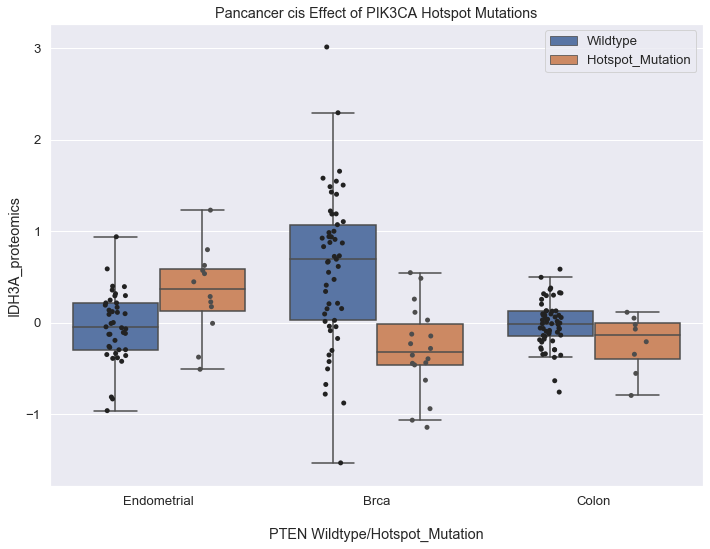

In [19]:
# pancancer cis plot
gene = 'IDH3A'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='cancer', y=gene, data = df, hue = 'Mutation',
                      hue_order = ["Wildtype_Tumor", "Missense_Mutation"], showfliers = False)    
boxplot.set_title('Pancancer cis Effect of PIK3CA Hotspot Mutations')
boxplot = sns.stripplot(x='cancer', y=gene, data = df, jitter = True, 
                           color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Missense_Mutation"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Hotspot_Mutation", ylabel = gene+"_proteomics")

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles, ['Wildtype', 'Hotspot_Mutation'])



plt.show()
plt.clf()
plt.close()

In [18]:
# fig = boxplot.get_figure()
# fig.savefig("cis_effects_proteomics.png")